In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sys
import os

# Ensure the src directory is in the Python path
sys.path.append(
    os.path.abspath(
        os.path.join(
            "..", "src" # Adjust the directory path as necessary
        )
    )
)
# Importing the necessary functions from data_processing.py
from data_preparation import load_data, clean_data, aggregate_user_data, segment_by_decile, check_for_outliers
from data_preparation import visualize_correlation, plot_total_data_usage, plot_top_categories
from data_preparation import plot_interactive, get_top_consumers, get_usage_by_service
from data_preparation import calculate_growth, describe_data, plot_histogram, plot_scatter, plot_correlation_heatmap, plot_pca
import pandas as pd


In [3]:

# Load a sample dataset (replace with your own file path)
file_path = "../Data/Week2_challenge_data_source.xlsx" # Change this to your actual CSV file path
df = load_data('../Data/Week2_challenge_data_source.xlsx')

# Show the first few rows of the dataset
df.head()


Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [4]:

# Clean the data by converting the appropriate columns to numeric (you can modify this based on your columns)
df_clean = clean_data(df, )

# Show cleaned data
df_clean.head()


Bearer Id               Start  Start ms                 End  \
11  13114483557479700480 2019-04-15 11:33:39     626.0 2019-04-25 18:44:14   
20  13042425955912400896 2019-04-17 00:35:20     363.0 2019-04-25 04:52:49   
68  13042425943152599040 2019-04-21 10:09:56       1.0 2019-04-25 01:39:17   
78  13042425945401499648 2019-04-21 19:35:55     344.0 2019-04-25 02:59:49   
84  13042425960321800192 2019-04-22 01:17:25     301.0 2019-04-25 01:17:26   

    End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
11   542.0   889834.0  2.082019e+14   3.366447e+10  8.600910e+13   
20   691.0   706649.0  2.082010e+14   3.365875e+10  8.654080e+13   
68   272.0   314961.0  2.082014e+14   3.366274e+10  3.528141e+13   
78   259.0   285833.0  2.082018e+14   3.366917e+10  3.566261e+13   
84   938.0   259201.0  2.082014e+14   3.366555e+10  8.637690e+13   

   Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
11            T21335C  ...           2805710.0          16817598.0   
20            T29714B  ...          15782415.0           9688165.0   
68            T72937C  ...          22191188.0          18851898.0   
78            L41432B  ...          14655680.0             26061.0   
84            T85779A  ...             69288.0          19177045.0   

    Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
11          18094847.0           2029991.0        504604946.0   
20          18625220.0          14679856.0        373953102.0   
68          15879318.0          10650621.0         48891264.0   
78           5444485.0          17740302.0        164451149.0   
84          10783199.0           8000048.0        496879416.0   

    Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
11          1063672.0       526987098.0        11382619.0        33691738.0   
20           574875.0       161357015.0          134689.0        26026033.0   
68         13607386.0       525208955.0         6472727.0        50576233.0   
78          6446720.0       415002189.0         4883208.0        32643783.0   
84          1530545.0       247233250.0         1175435.0        33314765.0   

    Total DL (Bytes)  
11       535118044.0  
20       422406937.0  
68        93360974.0  
78       193656366.0  
84       519351173.0  

[5 rows x 55 columns]

In [5]:
# Aggregate user data for total data usage (by default, it calculates 'Total Data (Bytes)')
df_aggregated = aggregate_user_data(df_clean, download_column="Total DL (Bytes)", upload_column="Total UL (Bytes)")

# Show aggregated data
df_aggregated.head()

/home/adane/Repository/TellCo-Data-Analysis/src/data_preparation.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Data (Bytes)'] = df[download_column] + df[upload_column]


Bearer Id               Start  Start ms                 End  \
11  13114483557479700480 2019-04-15 11:33:39     626.0 2019-04-25 18:44:14   
20  13042425955912400896 2019-04-17 00:35:20     363.0 2019-04-25 04:52:49   
68  13042425943152599040 2019-04-21 10:09:56       1.0 2019-04-25 01:39:17   
78  13042425945401499648 2019-04-21 19:35:55     344.0 2019-04-25 02:59:49   
84  13042425960321800192 2019-04-22 01:17:25     301.0 2019-04-25 01:17:26   

    End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
11   542.0   889834.0  2.082019e+14   3.366447e+10  8.600910e+13   
20   691.0   706649.0  2.082010e+14   3.365875e+10  8.654080e+13   
68   272.0   314961.0  2.082014e+14   3.366274e+10  3.528141e+13   
78   259.0   285833.0  2.082018e+14   3.366917e+10  3.566261e+13   
84   938.0   259201.0  2.082014e+14   3.366555e+10  8.637690e+13   

   Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
11            T21335C  ...          16817598.0          18094847.0   
20            T29714B  ...           9688165.0          18625220.0   
68            T72937C  ...          18851898.0          15879318.0   
78            L41432B  ...             26061.0           5444485.0   
84            T85779A  ...          19177045.0          10783199.0   

    Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
11           2029991.0        504604946.0          1063672.0   
20          14679856.0        373953102.0           574875.0   
68          10650621.0         48891264.0         13607386.0   
78          17740302.0        164451149.0          6446720.0   
84           8000048.0        496879416.0          1530545.0   

    Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  \
11       526987098.0        11382619.0        33691738.0       535118044.0   
20       161357015.0          134689.0        26026033.0       422406937.0   
68       525208955.0         6472727.0        50576233.0        93360974.0   
78       415002189.0         4883208.0        32643783.0       193656366.0   
84       247233250.0         1175435.0        33314765.0       519351173.0   

    Total Data (Bytes)  
11         568809782.0  
20         448432970.0  
68         143937207.0  
78         226300149.0  
84         552665938.0  

[5 rows x 56 columns]

In [7]:

# Segment the data by decile based on total data usage
df_segmented = segment_by_decile(df_aggregated, column="Total Data (Bytes)")

# Show segmented data
df_segmented.head()


/home/adane/Repository/TellCo-Data-Analysis/src/data_preparation.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decile'] = pd.qcut(df[column], 10, labels=False)


Bearer Id               Start  Start ms                 End  \
11  13114483557479700480 2019-04-15 11:33:39     626.0 2019-04-25 18:44:14   
20  13042425955912400896 2019-04-17 00:35:20     363.0 2019-04-25 04:52:49   
68  13042425943152599040 2019-04-21 10:09:56       1.0 2019-04-25 01:39:17   
78  13042425945401499648 2019-04-21 19:35:55     344.0 2019-04-25 02:59:49   
84  13042425960321800192 2019-04-22 01:17:25     301.0 2019-04-25 01:17:26   

    End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
11   542.0   889834.0  2.082019e+14   3.366447e+10  8.600910e+13   
20   691.0   706649.0  2.082010e+14   3.365875e+10  8.654080e+13   
68   272.0   314961.0  2.082014e+14   3.366274e+10  3.528141e+13   
78   259.0   285833.0  2.082018e+14   3.366917e+10  3.566261e+13   
84   938.0   259201.0  2.082014e+14   3.366555e+10  8.637690e+13   

   Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
11            T21335C  ...          18094847.0           2029991.0   
20            T29714B  ...          18625220.0          14679856.0   
68            T72937C  ...          15879318.0          10650621.0   
78            L41432B  ...           5444485.0          17740302.0   
84            T85779A  ...          10783199.0           8000048.0   

    Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
11        504604946.0          1063672.0       526987098.0        11382619.0   
20        373953102.0           574875.0       161357015.0          134689.0   
68         48891264.0         13607386.0       525208955.0         6472727.0   
78        164451149.0          6446720.0       415002189.0         4883208.0   
84        496879416.0          1530545.0       247233250.0         1175435.0   

    Total UL (Bytes)  Total DL (Bytes)  Total Data (Bytes)  decile  
11        33691738.0       535118044.0         568809782.0       5  
20        26026033.0       422406937.0         448432970.0       4  
68        50576233.0        93360974.0         143937207.0       0  
78        32643783.0       193656366.0         226300149.0       1  
84        33314765.0       519351173.0         552665938.0       5  

[5 rows x 57 columns]

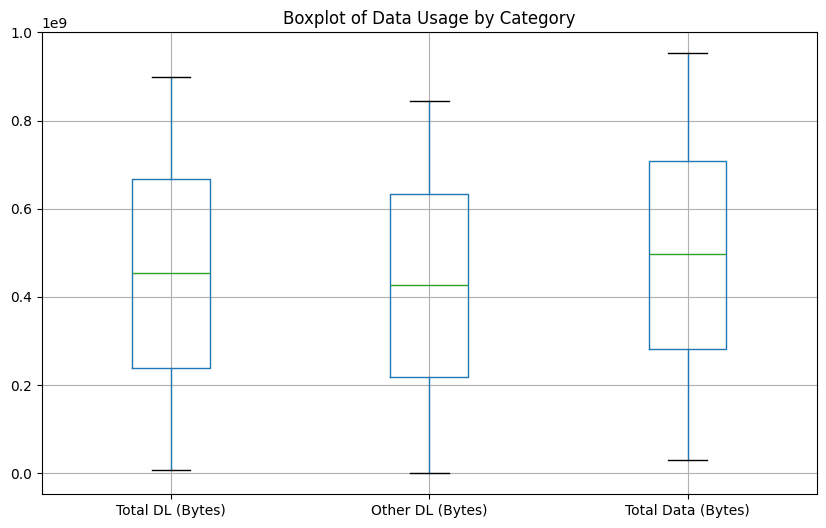

In [6]:

# Check for outliers in the data (by columns of interest)
check_for_outliers(df_aggregated, numeric_columns=["Total DL (Bytes)", "Other DL (Bytes)", "Total Data (Bytes)"])


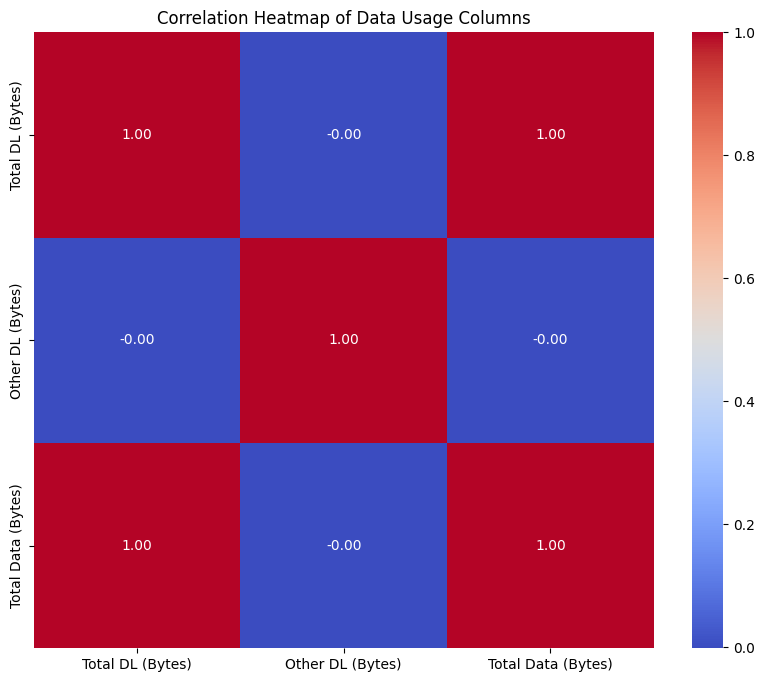

In [7]:

# Visualize correlation between selected numeric columns
visualize_correlation(df_aggregated, numeric_columns=["Total DL (Bytes)", "Other DL (Bytes)", "Total Data (Bytes)"])


/home/adane/Repository/TellCo-Data-Analysis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


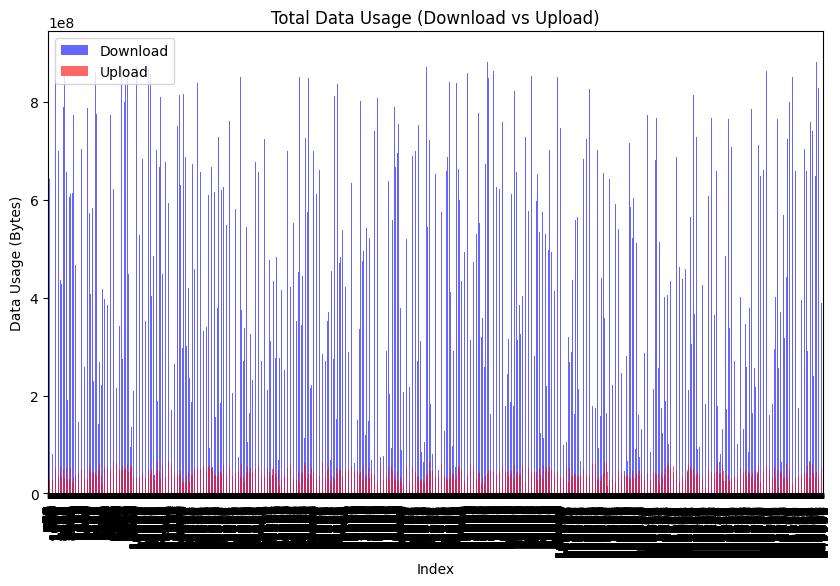

In [8]:

# Plot total data usage (download vs upload) with the specific columns
plot_total_data_usage(df_aggregated, download_column="Total DL (Bytes)", upload_column="Total UL (Bytes)")


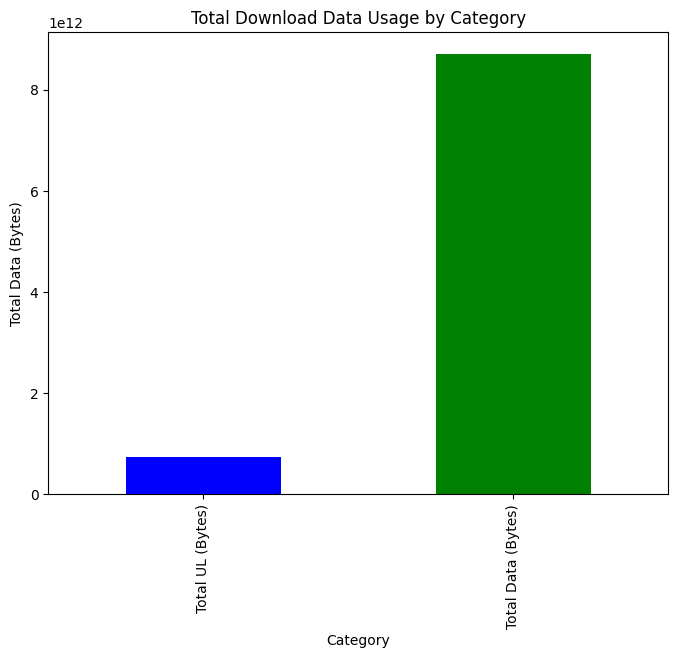

In [9]:

# Plot top categories (customize the categories as needed)
plot_top_categories(df_aggregated, categories=["Total UL (Bytes)", "Total Data (Bytes)"])


In [10]:

# Plot an interactive scatter plot based on total data usage
plot_interactive(df_aggregated, x_column="Total UL (Bytes)", y_column="Total Data (Bytes)", color_column="Last Location Name")


In [11]:

# Get top consumers based on total data usage
top_consumers = get_top_consumers(df_aggregated, data_column="Total Data (Bytes)", top_n=10)
print("Top Consumers:\n", top_consumers)


Top Consumers:
        Last Location Name  Total Data (Bytes)
139859            D29838A         952641334.0
66831             T83855B         952307464.0
38391             D78293B         944863143.0
60801             T88711B         944724720.0
138414            L61279C         944579478.0
114396            D92972A         944126574.0
38220             D72348B         943883106.0
138056            D83915C         943116932.0
141126            T73878C         943082164.0
36719             D21084A         943007327.0


Usage by Service:
 Youtube DL (Bytes)    2.057779e+11
Netflix DL (Bytes)    2.051172e+11
Gaming DL (Bytes)     7.406633e+12
dtype: float64
Growth Data:
        Last Location Name  Total Download Growth
11                T21335C              15.882768
20                T29714B              16.230170
68                T72937C               1.845946
78                L41432B               5.932412
84                T85779A              15.589219
...                   ...                    ...
149935            T29891A              22.378128
149951            T73896C               3.120337
149968            L53329B              15.705567
149973            T73780B               7.437351
149990            D70706A              17.069589

[17558 rows x 2 columns]


/home/adane/Repository/TellCo-Data-Analysis/src/data_preparation.py:123: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Basic Statistics:
                                Start      Start ms  \
count                          17558  17558.000000   
mean   2019-04-26 17:33:49.275600896    498.855621   
min              2019-04-11 13:59:57      0.000000   
25%       2019-04-25 02:48:56.500000    247.000000   
50%       2019-04-27 02:09:21.500000    500.000000   
75%              2019-04-28 02:40:29    750.000000   
max              2019-04-29 07:28:39    999.000000   
std                              NaN    290.378672   

                                 End        End ms     Dur. (ms)  \
count                          17558  17558.000000  1.755800e+04   
mean   2019-04-27 16:22:39.408417536    499.530983  8.212950e+04   
min              2019-04-24 23:01:26      0.000000  8.125000e+03   
25%    2019-04-26 03:06:41.750000128    252.000000  7.420700e+04   
50%              2019-04-28 00:20:45    499.000000  8.639900e+04   
75%    2019-04-29 03:05:05.750000128    748.000000  8.639900e+04   
max              2

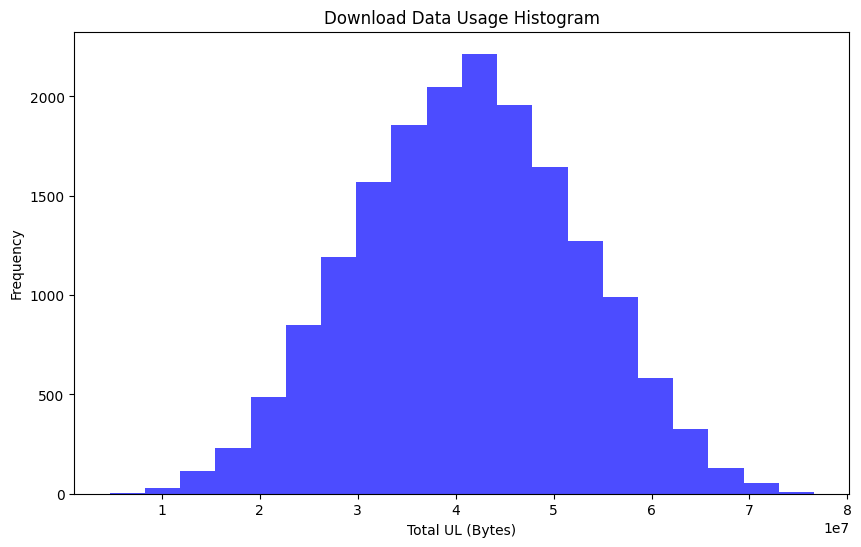

<Figure size 1000x600 with 0 Axes>

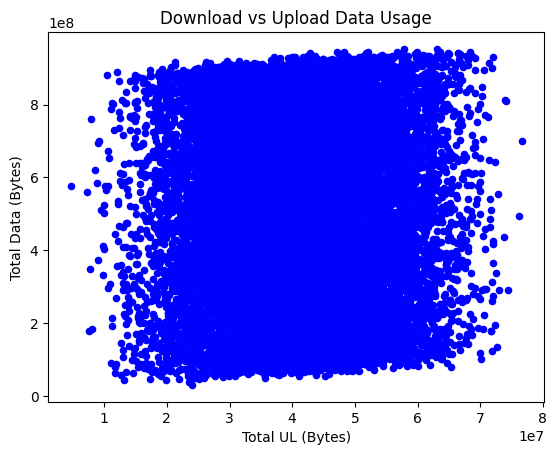

In [13]:

# Get usage by service (e.g., Youtube, Netflix, Gaming)
usage_by_service = get_usage_by_service(df_aggregated, services=["Youtube DL (Bytes)", "Netflix DL (Bytes)", "Gaming DL (Bytes)"])
print("Usage by Service:\n", usage_by_service)

# Calculate growth (download vs upload ratio)
growth_data = calculate_growth(df_aggregated, download_column="Total Data (Bytes)", upload_column="Total UL (Bytes)")
print("Growth Data:\n", growth_data)

# Get basic statistics about the data
basic_stats = describe_data(df_aggregated)
print("Basic Statistics:\n", basic_stats)

# Plot a histogram for a specified column (e.g., 'DownloadBytes')
plot_histogram(df_aggregated, column="Total UL (Bytes)", bins=20, title="Download Data Usage Histogram")

# Plot a scatter plot between two columns (e.g., 'DownloadBytes' vs 'UploadBytes')
plot_scatter(df_aggregated, x_column="Total UL (Bytes)", y_column="Total Data (Bytes)", title="Download vs Upload Data Usage")


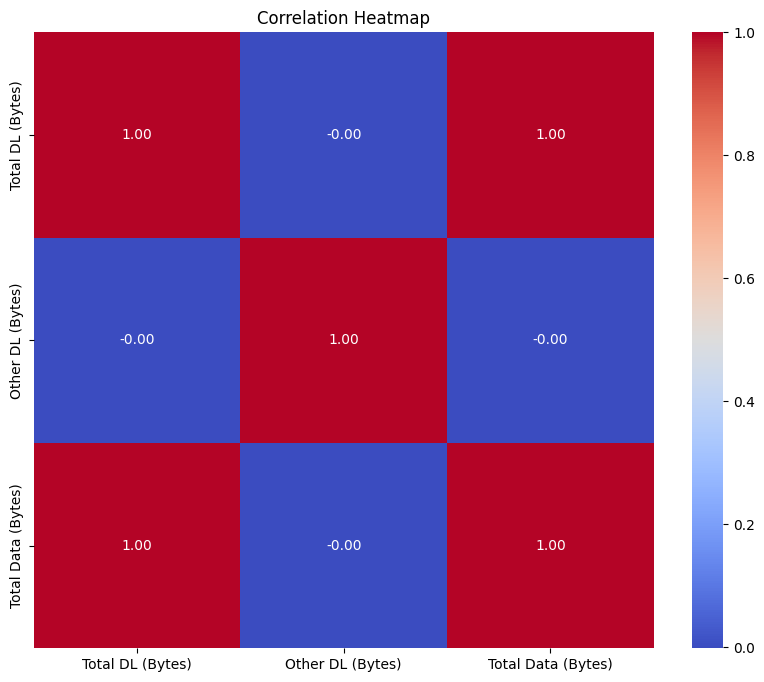

In [14]:

# Plot a correlation heatmap for selected columns
plot_correlation_heatmap(df_aggregated, columns=["Total DL (Bytes)", "Other DL (Bytes)", "Total Data (Bytes)"], title="Correlation Heatmap")

# PCA visualization (if you've performed PCA on your data, you can use this)
# Assuming PCA results are available in the DataFrame, with columns 'PC1' and 'PC2'
# Uncomment the line below if you have PCA results
# plot_pca(df_aggregated, title="PCA Plot")


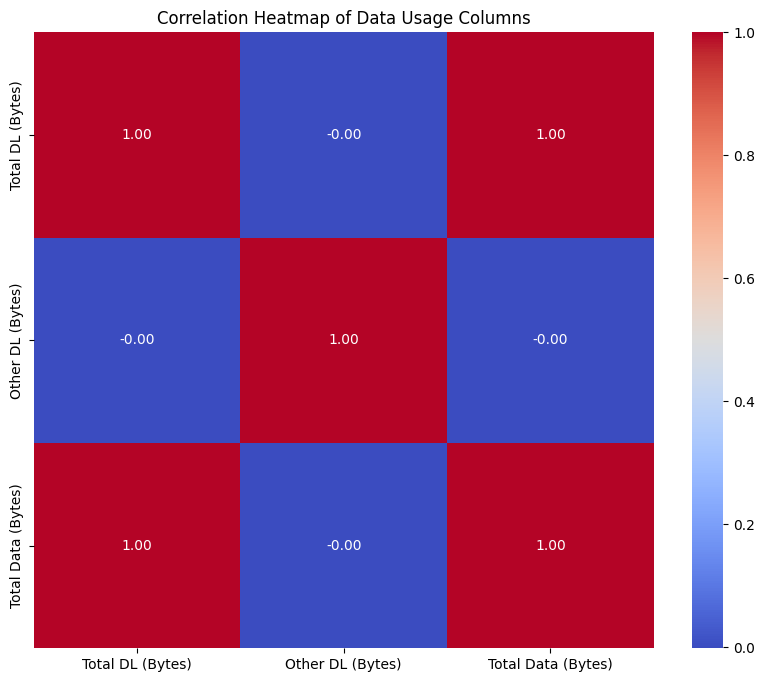

KeyError: 'UploadByTotal Data (Bytes)tes'

Error in callback <function _draw_all_if_interactive at 0x7c6a0959a0c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

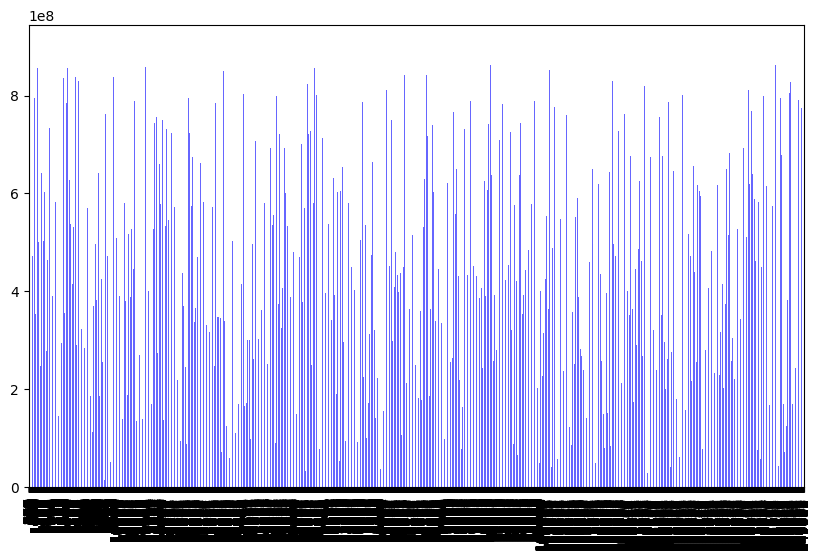

In [15]:

# Visualize correlation between selected numeric columns
visualize_correlation(df_aggregated, numeric_columns=["Total DL (Bytes)", "Other DL (Bytes)", "Total Data (Bytes)"])


In [ ]:

# Plot total data usage (download vs upload) with the specific columns
plot_total_data_usage(df_aggregated, download_column="Total DL (Bytes)", upload_column="UploadByTotal Data (Bytes)tes")


KeyError: 'UploadByTotal Data (Bytes)tes'

In [ ]:

# Plot top categories (customize the categories as needed)
plot_top_categories(df_aggregated, categories=["Total DL (Bytes)", "Total Data (Bytes)"])


In [ ]:

# Plot an interactive scatter plot based on total data usage
plot_interactive(df_aggregated, x_column="Total DL (Bytes)", y_column="Total Data (Bytes)", color_column="Last Location Name")


In [ ]:

# Get top consumers based on total data usage
top_consumers = get_top_consumers(df_aggregated, data_column="Total Data (Bytes)", top_n=10)
print("Top Consumers:\n", top_consumers)


In [ ]:

# Get usage by service (e.g., Youtube, Netflix, Gaming)
usage_by_service = get_usage_by_service(df_aggregated, services=["Youtube DL (Bytes)", "Netflix DL (Bytes)", "Gaming DL (Bytes)"])
print("Usage by Service:\n", usage_by_service)

# Calculate growth (download vs upload ratio)
growth_data = calculate_growth(df_aggregated, download_column="Total DL (Bytes)", upload_column="Total Data (Bytes)")
print("Growth Data:\n", growth_data)


In [ ]:

# Get basic statistics about the data
basic_stats = describe_data(df_aggregated)
print("Basic Statistics:\n", basic_stats)

# Plot a histogram for a specified column (e.g., 'DownloadBytes')
plot_histogram(df_aggregated, column="Total DL (Bytes)", bins=20, title="Download Data Usage Histogram")


In [ ]:

# Plot a scatter plot between two columns (e.g., 'DownloadBytes' vs 'UploadBytes')
plot_scatter(df_aggregated, x_column="Total DL (Bytes)", y_column="Total Data (Bytes)", title="Download vs Upload Data Usage")

# Plot a correlation heatmap for selected columns
plot_correlation_heatmap(df_aggregated, columns=["Total DL (Bytes)", "Other DL (Bytes)", "Total Data (Bytes)"], title="Correlation Heatmap")

# PCA visualization (if you've performed PCA on your data, you can use this)
# Assuming PCA results are available in the DataFrame, with columns 'PC1' and 'PC2'
# Uncomment the line below if you have PCA results
# plot_pca(df_aggregated, title="PCA Plot")
